> # Polynomial Regression

- En este micro-proyecto se implementará un modelo de Regresión Polinomial. Se usará un conjunto de datos (dataset) relacionado a el consumo de combustible y la emision de Dioxido de Carbono en autos. 

- Para este micro-proyecto se dividirán los datos en *trainign set* y *test set*, luego finalmente usar el modelo para predecir valores desconocidos. 

> ### - Importando los paquetes necesarios


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

> ### - Dataset

El conjunto de datos usado tiene como nombre FuelConsumption.csv

> ### - Entendiendo los Datos

El dataset `FuelConsumption.csv`: contiene puntuaciones del comsumo de combustible en modelos especificos y estimaciones de la emision de dioxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada.
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-Coursera-20231514&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

> ### - Exploracion del Dataset

- Primeramente leemos los dataset con pandas y mostramos las primeras cinco filas de los datos.

In [2]:
df = pd.read_csv("FuelConsumption.csv")

- Visualizamos las primeras 5 filas de nuestro dataset

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


- Vamos a seleccionar algunas características que queremos usar para el problema de Regresión

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

- Vamos a ver los primeros 8 ejemplos de las caracteristicas seleccionadas

In [5]:
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255


- Vamos a graficar los valores de Emission con respecto a Engine Size:

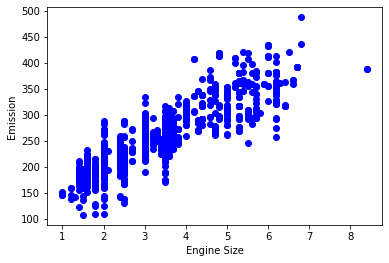

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

> ### - Creando el *train* y *test* *dataset*

- Separar *Train/Test* inplica dividir el dataset en entrenamiento y prueba respectivamente, los cuales son mutuamente exclusivo. Para luego entrenar al modelo con el conjunto de entrenamiento y evaluar con el conjunto de evaluación. Esto proporcionara una mejor presición en datos fuera de la muestra, porque el *testing dataset* no es parte de el dataset que hemos estado usando para entrenar los datos. Esto es mas realista para problemas del mundo real.

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

> ## - Polynomial Regression

- A menudo, la tendencia de los datos no es realmente lineal, sino más bien tiene una tendencia curvilinea. En estos casos podemos usar el metodo de Regresion Polinomial. De hecho, existen diferentes regressiones que pueden ser usados para ajustar un determinado conjunto de datos a la forma que puedan tener esos datos, tales como funciones cuadráticas, cúbicas y asi sucesivamente y puede continuar hasta grados infinitos.

- En esencia podemos llamar a todos estos tipos de funciones que representan los datos Polynomial Regression, donde la relación entre la variable independiente **x** y la variable dependiente **y** es modelado como polinomio de "n" grados en x. Suponiendo que quiera tener un Polynomial Regression de grado 2.

$y = b + theta_1  x + theta_2 x^2$

Ahora, para ajustar nuestros datos en esta ecuación, podemos crear unas características adicionales: 1, $x$, and $x^2$

Con la libreria Scikit-learn podemos utilizar la funcion **PloynomialFeatures()**, para manipular un nuevo conjunto de características a partir de el conjunto de caracteristicas original. Es decir, se generará una matriz que consta de toda la combinacion de polinomios de las caracteristicas con grado menor o igual al grado especificado. Por ejemplo, digamos que el conjunto de caracteristicas original tiene solo una caracteristica ENGINESIZE. Ahora, si seleccionamos un grado de polinomio que puede ser 2, entonces la funcion genera 3 caracteristicas, degree = 0, degree = 1 y degree = 2: 

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** ajusta los datos y luego los transforma; toma nuestros valores x, y genera una lista de nuestros datos del grado 0 al grado 2, el cual establece el grado a nuestro polinomio a 2.

Por lo tanto, la funcion fit_transform, eleva al grado elegido las caracteristicas y retorna un conjunto de caracteristicas que se ve igual a un analisis de Regresion Lineal Multiple, lo es, de hecho, la Regresion Polinomial es solo un caso especial de Regresion Lineal, con la principal idea de como selecionar las caracteristicas. Solo considera reemplazar $x$ con $x_1$, $x_1^2$ con $x_2$, y asi sucesivamente. Luego la ecuación de grado 2 se convertirá en: 

$y = b + theta_1  x_1 + theta_2 x_2$

Ahora podemos tratar con esto como un problema de "Regresion Lineal". Por lo tanto La Regresion Polinomial es considerada un caso especial del tradicional Multiple Linear Regression. Asi que se puede utilizar el mismo procedimiento que en una Regresion lineal para solucionar problemas de Regression Polunomial.

In [9]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.3967555  -1.57165314]]
Intercept:  [105.07887481]


- COmo se menciono antes, **Coefficients** y **Intercept**, son los parametros del ajuste de la linea curva. Dado que esto es una Regresion Lineal Multiple tipico, con 3 parametros, y conociendo que los parametros son el Intercep y Coefficients de un hiperplano, sklearn los estima de nuestro nuevo conjunto de caracteristicas. Vamos a graficarlos:

Text(0, 0.5, 'Emission')

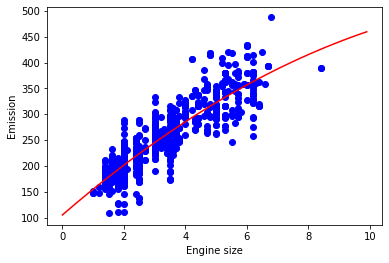

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

> ## - Evaluación

In [11]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.80
Residual sum of squares (MSE): 812.33
R2-score: 0.73


> ## - Práctica

Con el mismo conjunto de datos trazar una Regresion Polynomial de grado 3 (cubico).

Coefficients:  [[ 0.         20.83571313  6.7892535  -0.68850208]]
Intercept:  [137.76356298]
Mean absolute error: 22.99
Residual sum of squares (MSE): 830.65
R2-score: 0.72


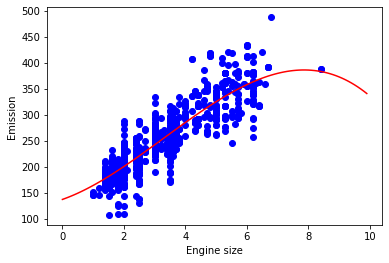

In [12]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

#los Coeficientes

print('Coefficients: ', clf3.coef_)
print('Intercept: ', clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

- Se concluye que para solucionar problemas de Regresion Polinomial,lo unico que se debe hacer es ajustar las caracteristicas y transformarlas con la funcion **fit_transform** de sklearn, esto retorna una función tipica de REgresion Lineal Multiple, y su mecanismo de resolución es el mismo.